<img src = "https://rec-data.kalibrr.com/www.kalibrr.ph/logos/SSYTB3EN2CEV9HZDWPPE4JHP8X2T7CNC6SDZST8Y-5d0b4f4b.png" width = 600>

# Introduction

**Kelompok 03 - Final Project 3 (Ensemble Learning / Random Forest)**<br>

Anggota Kelompok:
1. Putu Wahyu Kusuma Wardhana<br>
PYTN-KS05-001

2. Taufik Aji Putra<br>
PYTN-KS05-003

# Project Overview

Dataset yang digunakan pada projek ini adalah dataset publik yang tersedia diwebsite kaggle, untuk mendapatkan dataset ini dapat diakses melalui link ini: <a href="https://www.kaggle.com/andrewmvd/heart-failure-clinical-data"><b> klik disini</b></a>. Dataset ini berisi informasi mengenai record data pasien yang memiliki masalah dengan jantung mereka, dataset ini dapat digunakan untuk memprediksi apakah pasien akan mengalami kegagalan jantung atau tidak. Tujuan utama dari projek ini adalah membuat model untuk memprediksi kematian akibat gagal jantung menggunakan konsep Classification dengan ensemble Model. Algoritma yang dipilih pada pengerjaan projek ini adalah algoritma Random Forest. Random Forest merupakan algoritma yang menerapkan metode ensemble dari algoritma decision tree. Selain itu sebelum ke tujuan utama diperlukan beberapa proses seperti data cleaning, eksplorasi data, dan data preprocessing untuk memproses dataset agar siap dan dapat menghasilkan model klasifikasi yang optimal. Dataset ini memiliki dimensi sebesar 299 rows × 13 columns dengan semua fitur/kolom bertipe data numeric/continuous.

Final project 3 ini dibuat guna mengevaluasi konsep Ensemble sebagai berikut :
* Mampu memahami konsep Classification dan Ensemble Model
* Mampu mempersiapkan data untuk digunakan dalam Ensemble Model
* Mampu mengimplementasikan ensemble model untuk membuat prediksi

Attribute Information :
1. age - umur pasien
2. anemia - apakah ada pengurangan hemoglobin
3. creatinine_phosphokinase - level enzim CPK dalam mcg/L
4. diabetes - apakah pasien punya riwayat diabetes di setiap kontraksi jantung
5. ejection_fraction - persentase darah yang meninggalkan jantung dalam persentasi
6. high_blood_pressure - apakah pasien punya darah tinggi
7. platelets - jumlah platelet di darah dalam kiloplatelets/mL
8. serum_creatinine - level serum creatinine di darah dalam mg/dL
9. serum_sodium - level serum sodium di darah dalam mEq/L
10. sex - apakah pasien pria atau wanita
11. smoking - apakah pasien merokok
12. time - waktu dalam hari untuk follow-up
13. DEATH_EVENT - apakah pasien sudah meninggal saat waktu follow-up


# Import Library

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load Dataset

In [4]:
import os
os.environ['KAGGLE_USERNAME'] = 'taufikajip'
os.environ['KAGGLE_KEY'] = '7f1ea81999ae0bff7b14bd8c95f733e3'

In [5]:
! kaggle datasets download -d andrewmvd/heart-failure-clinical-data


  0% 0.00/3.97k [00:00<?, ?B/s]

100% 3.97k/3.97k [00:00<00:00, 2.80MB/s]


In [6]:
# Ekstrak File berbentuk ZIP
from zipfile import ZipFile

file_name = "/content/heart-failure-clinical-data.zip"

with ZipFile(file_name, 'r') as zip : 
  zip.extractall()
  print('Ekstrak File Berhasil')

Ekstrak File Berhasil


**Melihat dataset yang sudah diimport**

In [67]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


**Keterangan :**
* anemia : 0 = No, 1 = Yes
* diabetes : 0 = No, 1 = Yes
* high_blood_pressure : 0 = No, 1 = Yes
* sex : Gender of patient Male = 1, Female = 0
* smoking : 0 = No, 1 = Yes
* DEATH_EVENT : 0 = alive, 1 = death

# Exploratory Data Analysis

**Melihat info dataset**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


**Melihat nilai statistik dataset**

In [9]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


**Melihat missing values**

In [14]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Tidak terdapat data missing value pada dataset.

**Melihat duplicated data**

In [15]:
df.duplicated().sum()

0

Tidak terdapat data duplikat pada dataset

**Melihat persebaran data target (DEATH_EVENT)**

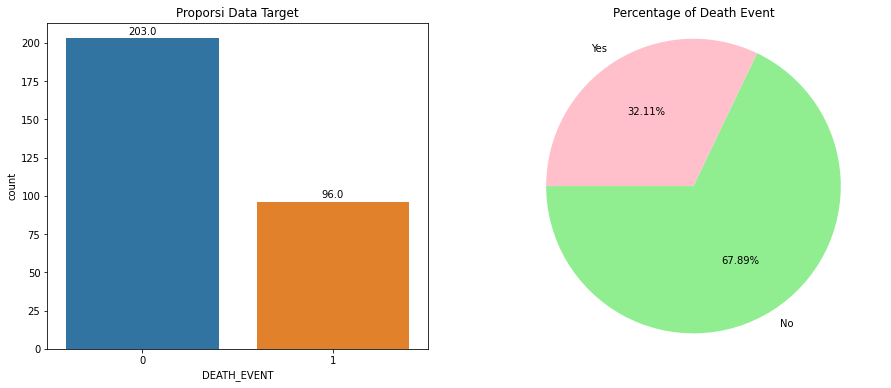

In [16]:
plt.rcParams['figure.figsize']=(15,6)
plt.subplot(121)
plt.title("Proporsi Data Target")
ax = sns.countplot(x='DEATH_EVENT', data=df)
for i in ax.patches:
     ax.annotate(format(i.get_height(), '0.1f'), (i.get_x() + i.get_width()/2.,i.get_height()),
               ha='center',va='center',xytext=(0,7), textcoords='offset points')
        
plt.subplot(122)
plt.title("Percentage of Death Event")
death_event_size = df['DEATH_EVENT'].value_counts().values.tolist()
death_event_label = 'No','Yes'
colors = ['lightgreen','pink']
pcs, texts, autotexts = plt.pie(death_event_size, labels=death_event_label,colors=colors,
                             autopct='%2.2f%%', startangle=180)
    
plt.axis('equal')
plt.show()

Dapat dilihat bahwa data target ('DEATH_EVENT') tidak seimbang sehingga akan dilakukan penanganan pada tahapan Data Modelling.

## Variabel Numerik

**Melihat distribusi data (Variabel Numerikal)**

['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']


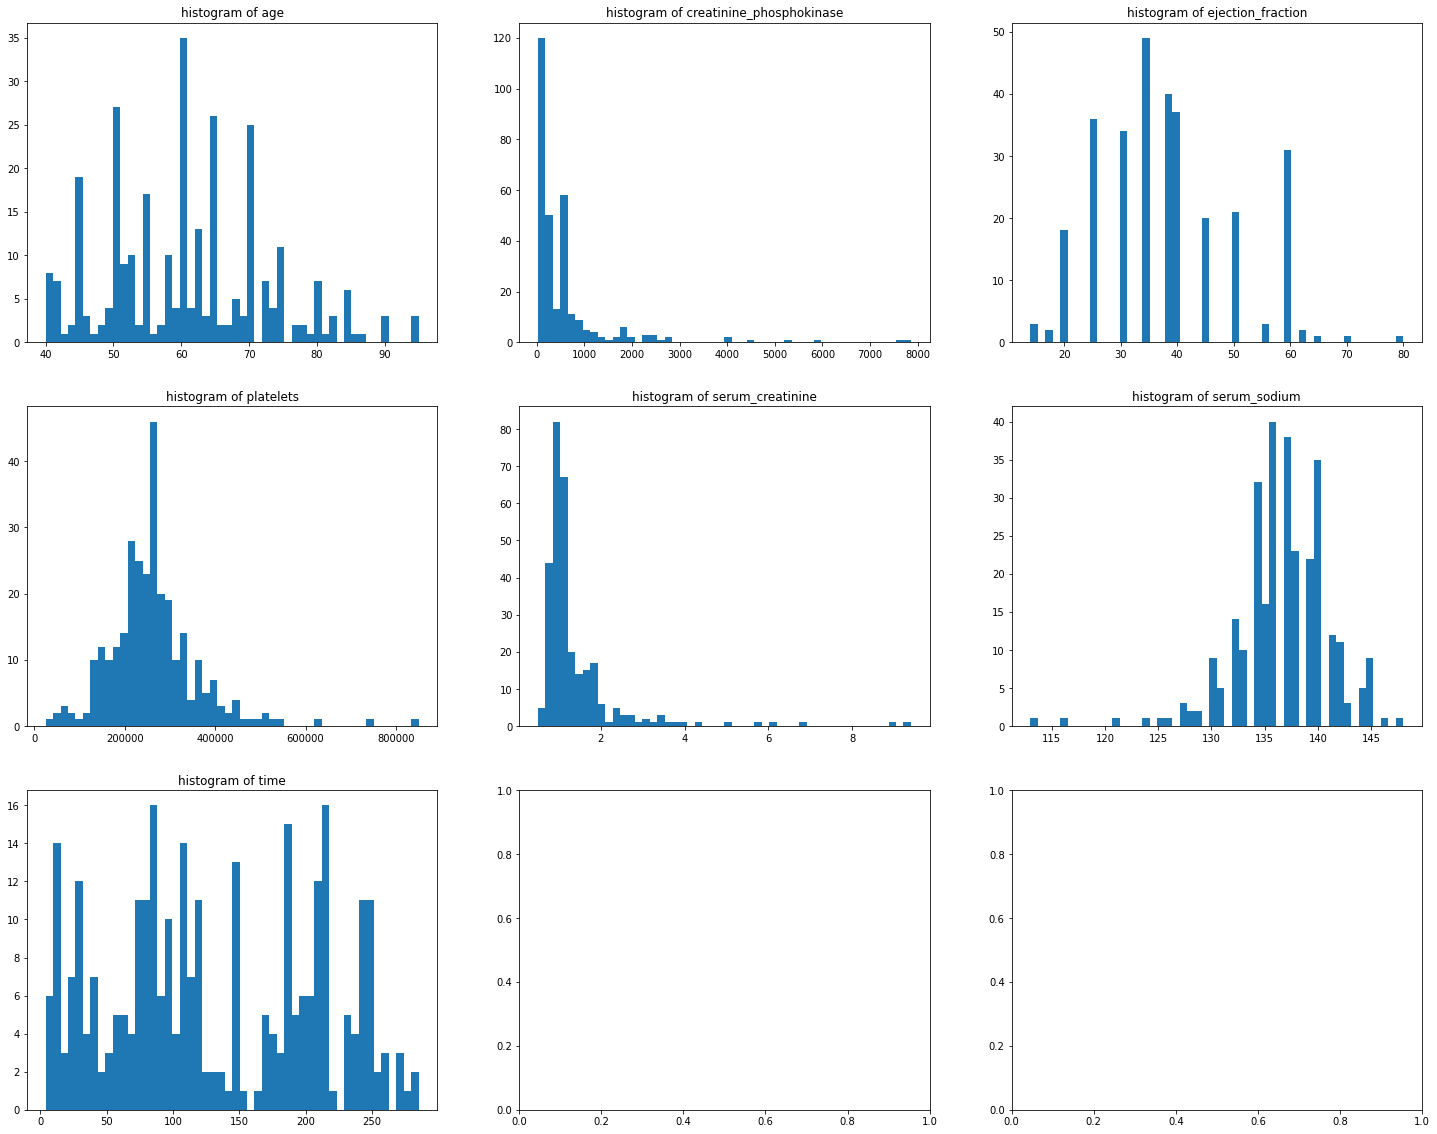

In [69]:
num_cols = ['age','creatinine_phosphokinase','ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium','time']
print(num_cols)
fig, ax = plt.subplots(3,3, sharex=False, sharey=False, figsize=(25,20))
counts = 0
for col in num_cols:
    ax_x = counts//3
    ax_y = counts%3
    ax[ax_x, ax_y].hist(df[col],bins=50)
    ax[ax_x, ax_y].set_title(f"histogram of {col}")
    counts+=1
plt.show()

* Pada kolom sex dan DEATH_EVENT memiliki nilai 0 dan 1, oleh karena itu untuk memudahkan dalam visualisasi dan analisis data pada kolom sex diganti nilai 0 = Female, 1=Male sedangkan untuk kolom DEATH_EVENT diganti dengan 0=alive, 1= death. agar tidak merubah data asli maka diperlukan kolom tambahan untuk perubahan tersebut.

**Melakukan replace tanpa merubah kolom asli untuk memperjelas visualisasi**

In [82]:
df['gender'] = df['sex'].replace({1:'Male', 0:'Female'})
df['death_status'] = df['DEATH_EVENT'].replace({1:'Death', 0:'Alive'})
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,gender,death_status
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,Male,Death
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,Male,Death
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,Male,Death
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,Male,Death
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,Female,Death


**Melihat Korelasi antara setiap variabel Kontinu secara sekilas**

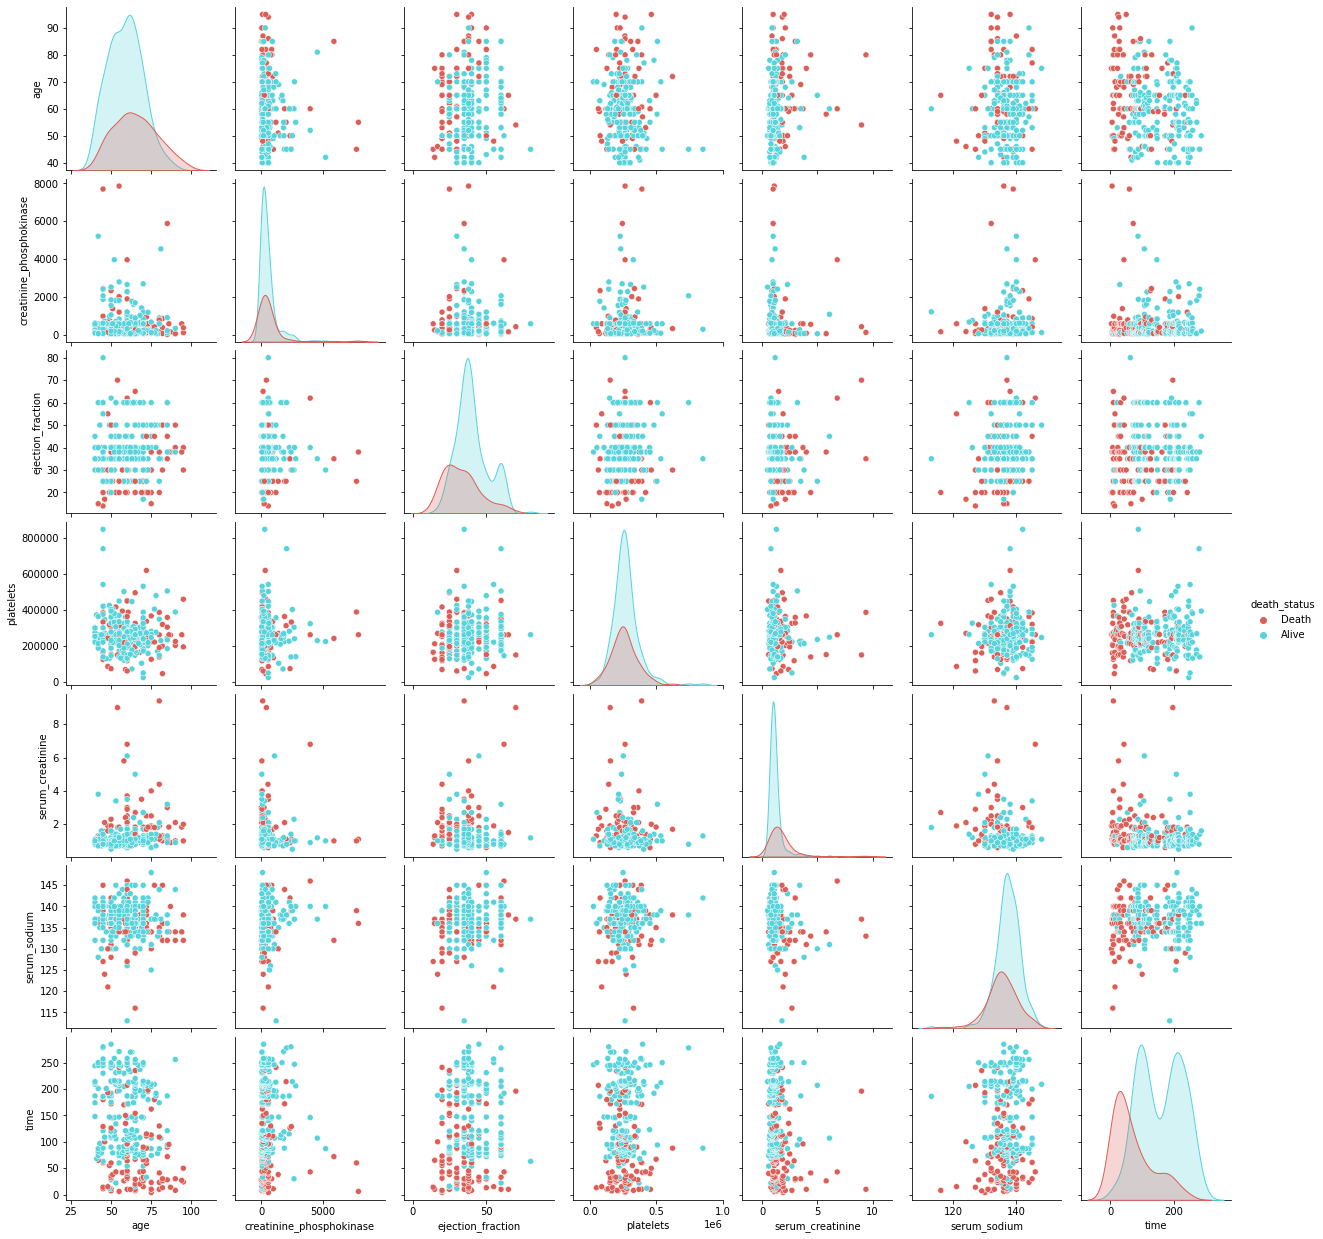

In [19]:
sns.pairplot(df[['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium',
                'time','death_status']], hue='death_status', diag_kind='kde', kind='scatter',palette='hls')
plt.show()

**Warna merah** menunjukkan terjadinya kejadian kematian dan **warna biru** tidak menunjukkan adanya kejadian kematian. untuk variabel time dengan variabel yang lain, semakin tinggi waktu follow up (dalam hari) semakin tinggi pula tingkat status pasien yang masih hidup. selain itu, scatter plot dan density plot telah menunjukkan perbedaan yang cukup jelas antara data kejadian kematian dan tidak ada kejadian kematian. 

Untuk penjelasan lebih akan dilakukan visualisasi menggunakan boxplot.

**Visualisasi distribusi data dan boxplot (Numerik)**

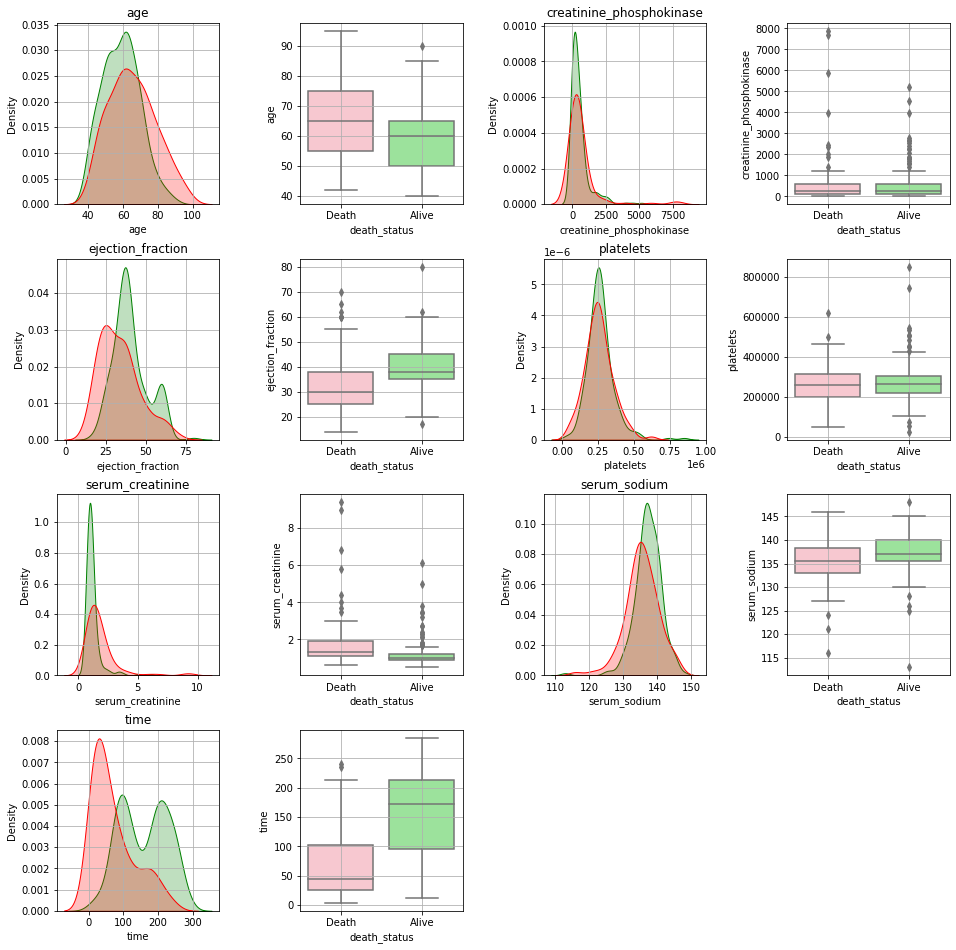

In [20]:
num_cols = ['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']
plt.figure(figsize=(16,25))
for i, col in enumerate(num_cols):
    plt.subplot(6,4, i*2+1)
    plt.subplots_adjust(wspace=0.5,hspace=0.3)
    plt.title(col)
    plt.grid()
    sns.kdeplot(df.loc[df['death_status']=='Alive',col],label='alive',color='green',shade=True)
    sns.kdeplot(df.loc[df['death_status']=='Death',col],label='dead',color='red', shade=True)
    plt.subplot(6,4,i*2+2)
    sns.boxplot(data=df,y=col,x='death_status', palette=['pink','lightgreen'])
    plt.grid()

Secara visual, terlihat beberapa variabel merujuk distribusi normal dengan tingkat skewness yang beragam juga , dan beberapa ada terdapat outlier. Akan dilakukan proses filtering outlier pada tahap data cleaning.

## Variabel Kategorik

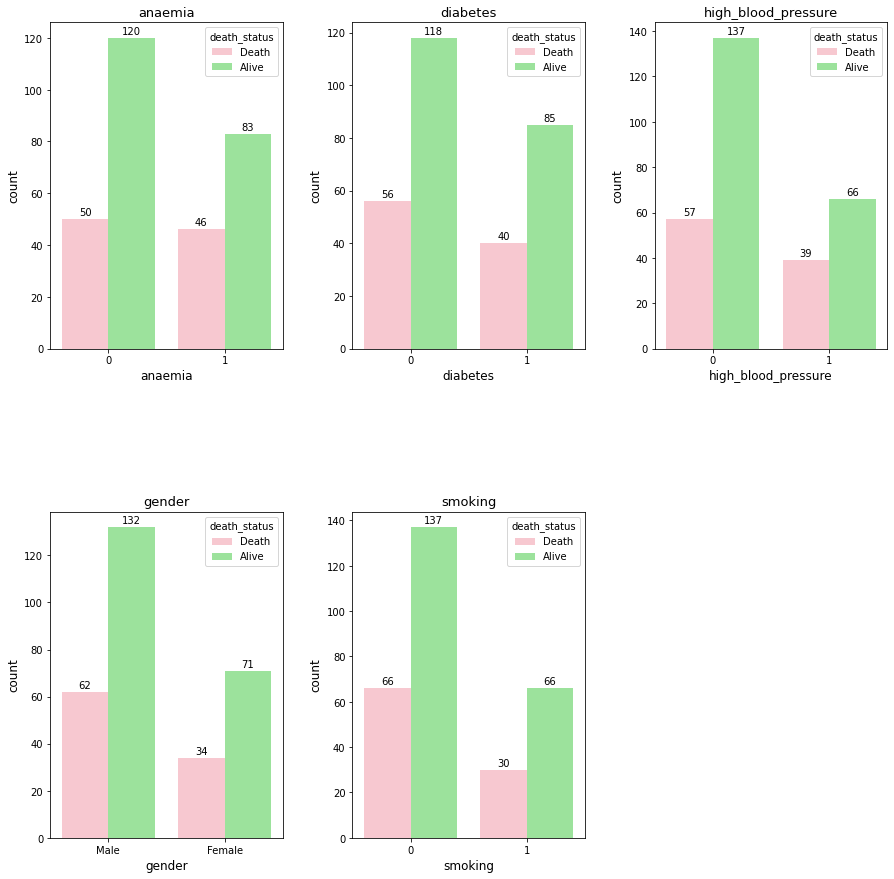

In [21]:
cat_col = ['anaemia','diabetes','high_blood_pressure','gender','smoking']
plt.figure(figsize=(15,15))
for i, col in enumerate(cat_col):
    plt.subplot(2,3,i+1)
    plt.title(col, fontsize=13)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("count",fontsize=12)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    ax = sns.countplot(data=df, x=col, hue='death_status',palette=['pink','lightgreen'])
    for i in ax.patches:
        ax.annotate(format(i.get_height()), (i.get_x() + i.get_width()/2.,i.get_height()),
               ha='center',va='center',xytext=(0,7), textcoords='offset points')

Terlihat dengan jelas perbedaan jumlah kejadian kematian antara perbedaan status gender, tekanan darah tinggi, perokok, dan diabetes. dengan visualisasi data diatas juga menunjukkan distribusi data yang tidak seimbang pada jumlah pasien yang merokok atau tidak, gender laki-laki atau perempuan, pasien yang memiliki tekanan darah tinggi atau tidak.

**Melihat perbandingan usia dengan status kematian**

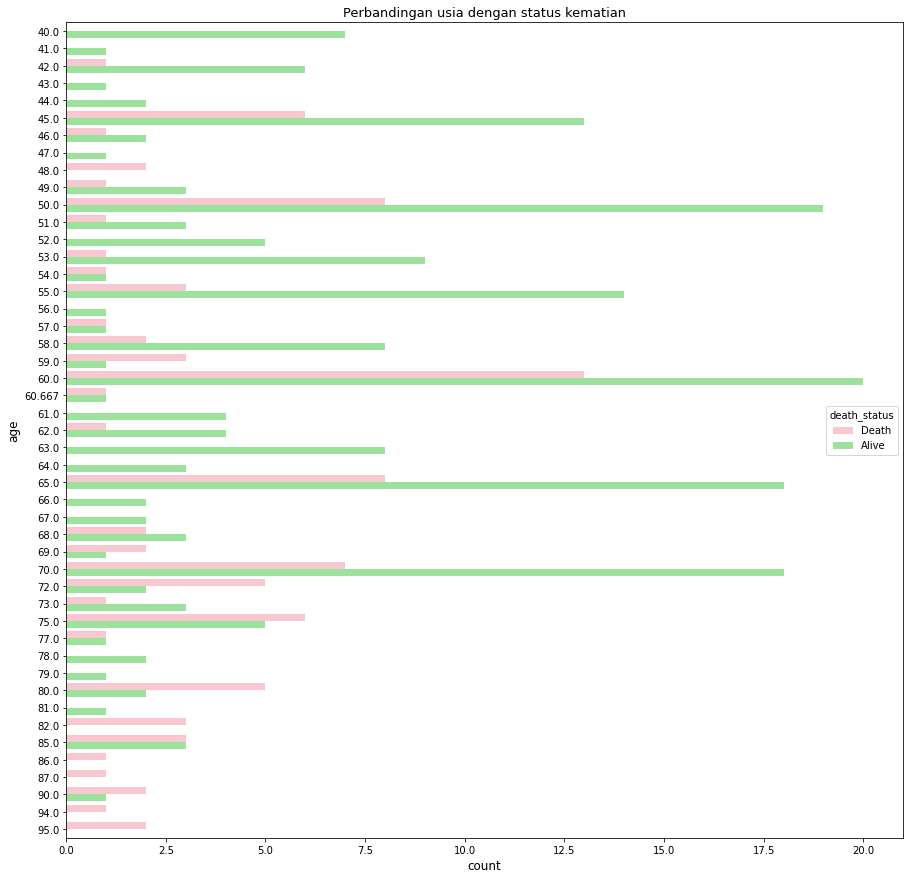

In [22]:
plt.figure(figsize=(15,15))
plt.title("Perbandingan usia dengan status kematian", fontsize=13)
plt.xlabel("Age", fontsize=12)
plt.ylabel("count",fontsize=12)
ax = sns.countplot(data=df, y='age', hue='death_status',palette=['pink','lightgreen'])

Dapat dilihat bahwa usia pasien dengan status tingkat kematian tertinggi yaitu pasien dengan usia 60 tahun. Dan juga bisa dilihat bahwa pada usia 40, 52, 61, 63, 66, dan 78 tahun memiliki status kematian ('Alive') sedangkan usia 48, 86, 87, 94 dan 95 tahun semuanya memiliki status kematian ('Death').

# Data Preprocessing

**Mengecek kembali missing value dengan mengdrop na**

In [23]:
df.dropna()
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
gender                      0
death_status                0
dtype: int64

**Melihat info dataset**

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
 13  gender                    299 non-null    object 
 14  death_stat

**Melihat kolom**

In [25]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT', 'gender', 'death_status'],
      dtype='object')

## Handling Outliers

**Handling Outlier pada kolom numerik**

- Boxplot menunjukkan outlier sebelum dilakukan filtering

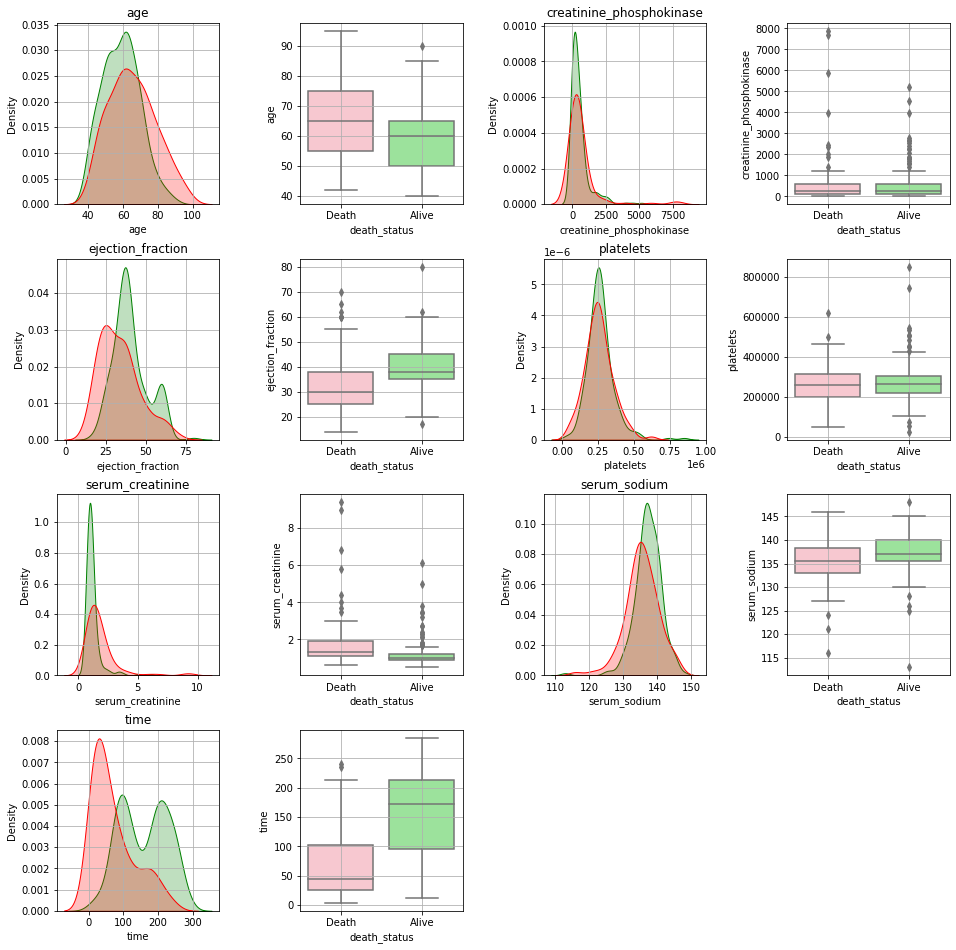

In [26]:
num_cols = ['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']
plt.figure(figsize=(16,25))
for i, col in enumerate(num_cols):
    plt.subplot(6,4, i*2+1)
    plt.subplots_adjust(wspace=0.5,hspace=0.3)
    plt.title(col)
    plt.grid()
    sns.kdeplot(df.loc[df['death_status']=='Alive',col],label='alive',color='green',shade=True)
    sns.kdeplot(df.loc[df['death_status']=='Death',col],label='dead',color='red', shade=True)
    plt.subplot(6,4,i*2+2)
    sns.boxplot(data=df,y=col,x='death_status', palette=['pink','lightgreen'])
    plt.grid()

- Filtering Outlier

In [83]:
num_cols = ['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']
def RemoveOutliers(num_cols):
    for col in num_cols:
        iqr = df[col].quantile(0.75)-df[col].quantile(0.25)
        lower_threshold = df[col].quantile(0.25)-(iqr*1.5)
        upper_threshold = df[col].quantile(0.75)+(iqr*1.5)
        print(f"Rentang nilai outlier pada fitur {col} : <{round(lower_threshold,2)} atau >{round(upper_threshold,2)}")
        df.loc[(df[col]<=lower_threshold),col] = lower_threshold
        df.loc[(df[col]>=upper_threshold),col] = upper_threshold
RemoveOutliers(num_cols)

Rentang nilai outlier pada fitur age : <22.5 atau >98.5
Rentang nilai outlier pada fitur creatinine_phosphokinase : <-581.75 atau >1280.25
Rentang nilai outlier pada fitur ejection_fraction : <7.5 atau >67.5
Rentang nilai outlier pada fitur platelets : <76000.0 atau >440000.0
Rentang nilai outlier pada fitur serum_creatinine : <0.15 atau >2.15
Rentang nilai outlier pada fitur serum_sodium : <125.0 atau >149.0
Rentang nilai outlier pada fitur time : <-122.0 atau >398.0


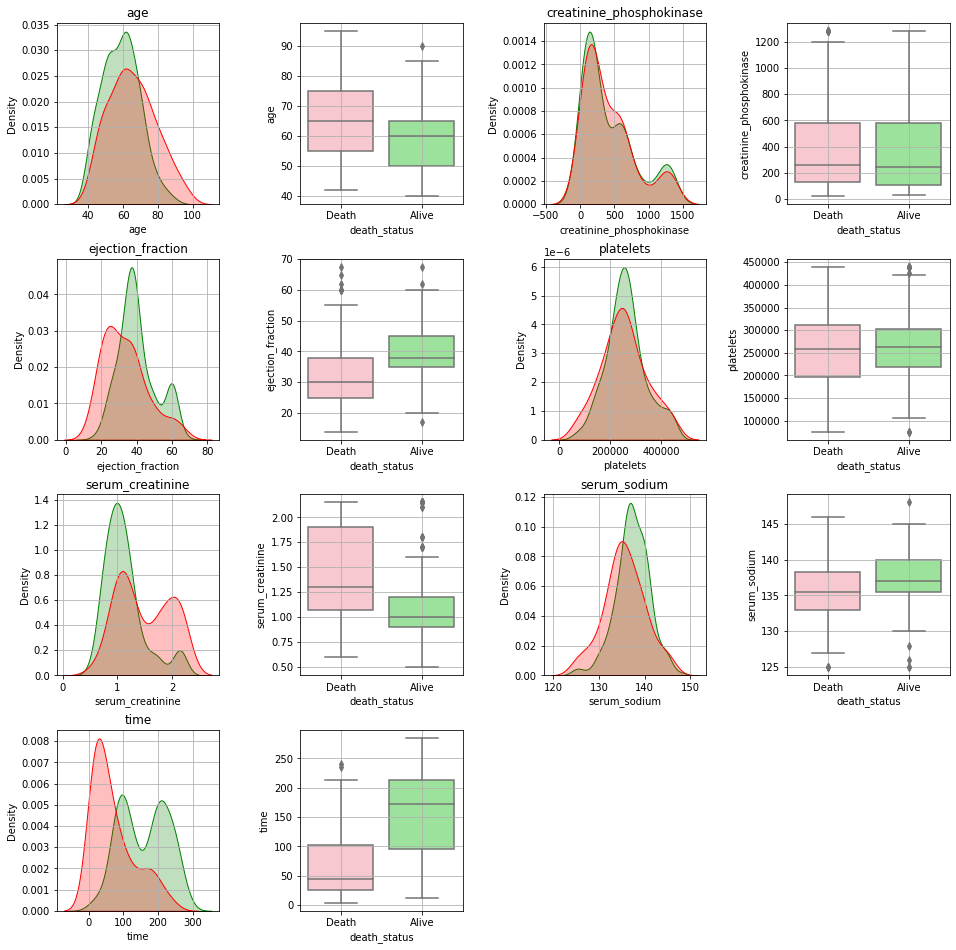

In [28]:
plt.figure(figsize=(16,25))
for i, col in enumerate(num_cols):
    plt.subplot(6,4, i*2+1)
    plt.subplots_adjust(wspace=0.5,hspace=0.3)
    plt.title(col)
    plt.grid()
    sns.kdeplot(df.loc[df['death_status']=='Alive',col],label='alive',color='green',shade=True)
    sns.kdeplot(df.loc[df['death_status']=='Death',col],label='dead',color='red', shade=True)
    plt.subplot(6,4,i*2+2)
    sns.boxplot(data=df,y=col,x='death_status', palette=['pink','lightgreen'])
    plt.grid()

In [84]:
df = df.drop(columns=['gender','death_status'])
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582.00,0,20.0,1,265000.00,1.90,130,1,0,4,1
1,55.0,0,1280.25,0,38.0,0,263358.03,1.10,136,1,0,6,1
2,65.0,0,146.00,0,20.0,0,162000.00,1.30,129,1,1,7,1
3,50.0,1,111.00,0,20.0,0,210000.00,1.90,137,1,0,7,1
4,65.0,1,160.00,1,20.0,0,327000.00,2.15,125,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61.00,1,38.0,1,155000.00,1.10,143,1,1,270,0
295,55.0,0,1280.25,0,38.0,0,270000.00,1.20,139,0,0,271,0
296,45.0,0,1280.25,1,60.0,0,440000.00,0.80,138,0,0,278,0
297,45.0,0,1280.25,0,38.0,0,140000.00,1.40,140,1,1,280,0


## Correlation Check

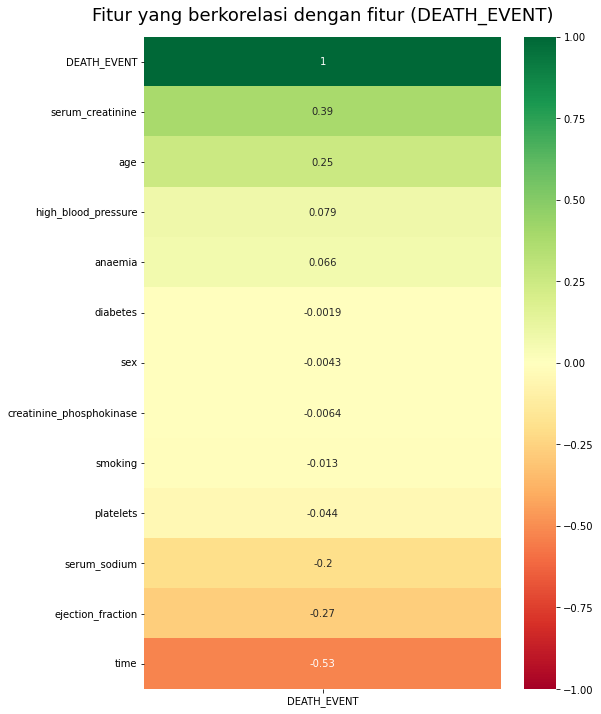

In [30]:
plt.figure(figsize=(8, 12))
heatmap =sns.heatmap(df.corr()[['DEATH_EVENT']].sort_values(by='DEATH_EVENT', ascending=False), vmin=-1, vmax=1, annot=True, cmap='RdYlGn')
heatmap.set_title('Fitur yang berkorelasi dengan fitur (DEATH_EVENT)', fontdict={'fontsize':18}, pad=16);

Dapat dilihat bahwa terdapat beberapa kolom yang memiliki nilai korelasi lebih kecil dari 0.1 yakni kolom ['high_blood_pressure','platelets','smoking','sex','diabetes','anaemia', 'creatinine_phosphokinase'] sehingga akan dilakukan drop kolom tersebut.

In [85]:
df.drop(columns=['high_blood_pressure','platelets','smoking','sex','diabetes','anaemia', 'creatinine_phosphokinase'],axis=1, inplace=True)
df.head()

,age,ejection_fraction,serum_creatinine,serum_sodium,time,DEATH_EVENT
0,75.0,20.0,1.90,130,4,1
1,55.0,38.0,1.10,136,6,1
2,65.0,20.0,1.30,129,7,1
3,50.0,20.0,1.90,137,7,1
4,65.0,20.0,2.15,125,8,1


## Skewness Check

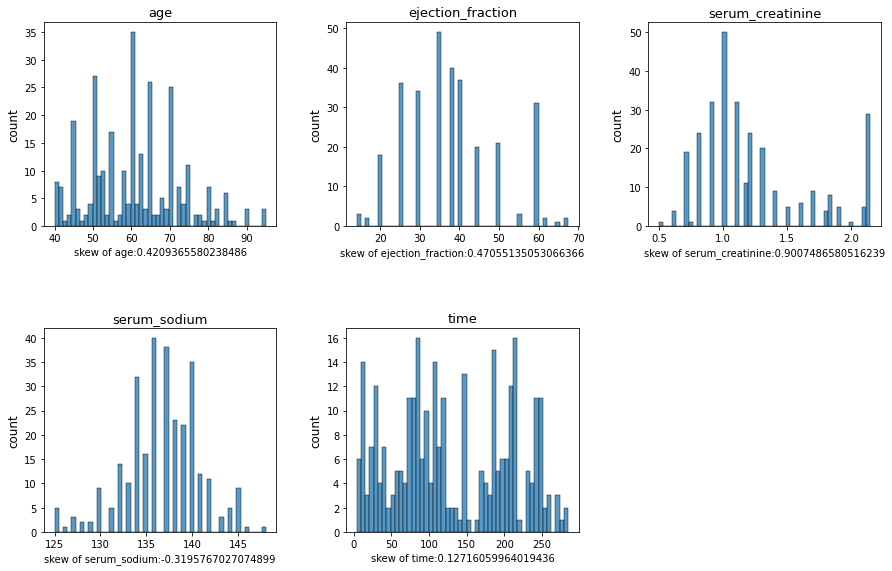

In [32]:
from scipy.stats import skew

cols = df.loc[:,df.columns!='DEATH_EVENT'].columns.tolist()
plt.figure(figsize=(15,15))
for i, col in enumerate(cols):
    plt.subplot(3,3,i+1)
    plt.title(col, fontsize=13)
    plt.xlabel(f"skew of {col}:{skew(df[col])}")
    plt.ylabel("count",fontsize=12)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    sns.histplot(data=df, x=col, bins=50,palette=['red','green'])

Keterangan Skewness:
* Cukup simetris (fairly symmetrical) : -0.5 to 0.5
* Kemiringan sedang (moderate skewed) : -0.5 to -1.0 and 0.5 to 1.0
* Kemiringan berat (highly skewed) : <-1.0 and > 1.0

Pada data ini, Skewness pada beberapa kolom terlihat pada kriteria 'Fairly Symmetrical'. Sedangkan 1 kolom yakni 'serum_creatinine' termasuk kriteria 'Moderate Skewed' dengan nilai skewness sebesar -0.90

**Transformasi Boxcox**

Transformasi dilakukan untuk variabel dengan tingkat skewness yang tinggi dengan range nilai skew <-1 dan >1. Dalam hal ini tidak ada yang memasuki kriteria tersebut, tetapi kami ingin melakukan transformasi pada 'serum_creatinine' karena nilai skewness mendekati -1

- Sebelum dilakukan Transformasi BoxCox

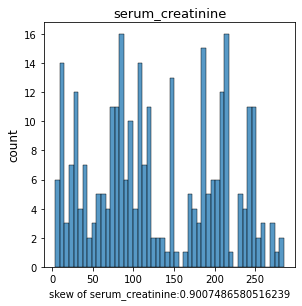

In [92]:
plt.figure(figsize=(4.5,4.5))
plt.title('serum_creatinine', fontsize=13)
plt.xlabel(f"skew of {'serum_creatinine'}:{skew(df['serum_creatinine'])}")
plt.ylabel("count",fontsize=12)
plt.subplots_adjust(hspace=0.5, wspace=0.3)
sns.histplot(data=df, x=col, bins=50,palette=['red','green'])

- Sesudah dilakukan transformasi BoxCox

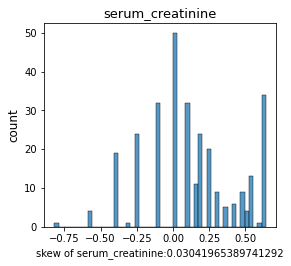

In [93]:
from scipy.stats import boxcox
postive = ['serum_creatinine']
plt.figure(figsize=(15,15))
for i, col in enumerate(postive):
    df[col] = boxcox(df[col])[0]
    plt.subplot(3,3,i+1)
    plt.title(col, fontsize=13)
    plt.xlabel(f"skew of {col}:{skew(df[col])}")
    plt.ylabel("count",fontsize=12)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    sns.histplot(data=df, x=col, bins=50)

Dapat dilihat bahwa kolom serum_creatinine sudah memiliki skewness yang fairly symetrical.

**Melihat kolom df**

In [94]:
df

,age,ejection_fraction,serum_creatinine,serum_sodium,time,DEATH_EVENT
0,75.0,20.0,0.553861,130,4,1
1,55.0,38.0,0.093201,136,6,1
2,65.0,20.0,0.246791,129,7,1
3,50.0,20.0,0.553861,137,7,1
4,65.0,20.0,0.642597,125,8,1
...,...,...,...,...,...,...
294,62.0,38.0,0.093201,143,270,0
295,55.0,38.0,0.174708,139,271,0
296,45.0,60.0,-0.235300,138,278,0
297,45.0,38.0,0.311149,140,280,0


In [95]:
df.columns

Index(['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time',
       'DEATH_EVENT'],
      dtype='object')

## Split Dataset

**Split dataset dengan perbandingan Training - Test (80:20)**

In [35]:
X = df.drop(['DEATH_EVENT'], axis = 1)
y = df['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [36]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(239, 5)
(239,)
(60, 5)
(60,)


## Min-Max Scaler

**Akan dilakukan min-max scaler terhadap semua fitur yang tersisa**

In [37]:
min_max_scaler = MinMaxScaler()

min_max_scaler.fit(X_train)

X_train_scaled = min_max_scaler.transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)

# Modeling

**Menggunakan program print_score dan cm_heatmap untuk proses modelling**

In [38]:
#Program print_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [39]:
#Program cm_heatmap

def cm_heatmap(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        cm = confusion_matrix(y_train, pred)
        print(f"Confusion Matrix: \n {sns.heatmap(cm, annot=True)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        cm = confusion_matrix(y_test, pred)
        print(f"Confusion Matrix: \n {sns.heatmap(cm, annot=True)}\n")

## Random Forest

**Random Forest (Default)**

In [40]:
RF = RandomForestClassifier(n_estimators=15, random_state=0)
RF.fit(X_train_scaled, y_train)

print_score(RF, X_train_scaled, y_train, X_test_scaled, y_test, train=False)

Test Result:
Accuracy Score: 88.33%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.875000   0.900000  0.883333   0.887500      0.884583
recall      0.945946   0.782609  0.883333   0.864277      0.883333
f1-score    0.909091   0.837209  0.883333   0.873150      0.881536
support    37.000000  23.000000  0.883333  60.000000     60.000000
_______________________________________________
Confusion Matrix: 
 [[35  2]
 [ 5 18]]



Confusion Matrix: 
 AxesSubplot(0.125,0.125;0.62x0.755)



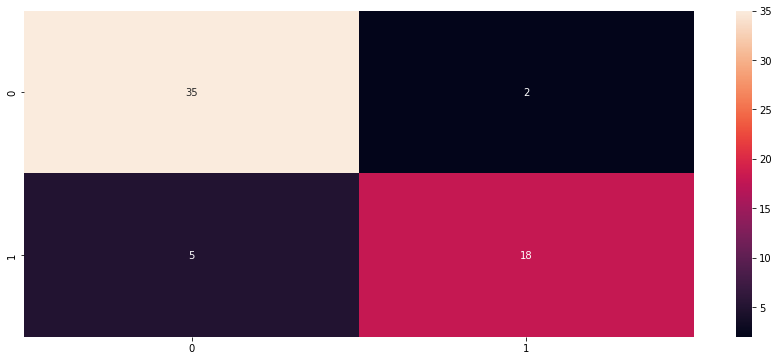

In [41]:
#Confusion Matrix SVM 
cm_heatmap(RF, X_train_scaled, y_train, X_test_scaled, y_test, train=False)

In [73]:
test_score = (accuracy_score(y_test, RF.predict(X_test_scaled))*100).round(2)
ypred = RF.predict(X_test_scaled)

precision_score = (metrics.precision_score(y_test,ypred)*100).round(2)
recall_score = (metrics.recall_score(y_test,ypred)*100).round(2)
f1_score = (metrics.f1_score(y_test,ypred)*100).round(2)

results_df = pd.DataFrame(data=[["Random Forest", test_score, precision_score, recall_score, f1_score]], 
                          columns=['Model', 'Testing Accuracy %', 'Precision %', 'Recall %', 'F1 Score %'])
results_df

,Model,Testing Accuracy %,Precision %,Recall %,F1 Score %
0,Random Forest,88.33,90.0,78.26,83.72


## Random Forest (SMOTE)

In [43]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print("Before oversampling: ",Counter(y))
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

print("After oversampling: ",Counter(y_smote))
Xtrain_smote, Xtest_smote, ytrain_smote, ytest_smote = train_test_split(X_smote,y_smote,test_size=0.2, random_state=0)

Before oversampling:  Counter({0: 203, 1: 96})
After oversampling:  Counter({1: 203, 0: 203})


**Min-Max Scaler (After SMOTE)**

In [44]:
min_max_scaler = MinMaxScaler()

min_max_scaler.fit(Xtrain_smote)

X_train_scaled_sm = min_max_scaler.transform(Xtrain_smote)
X_test_scaled_sm = min_max_scaler.transform(Xtest_smote)

**Random Forest Modelling (SMOTE)**

In [45]:
# Random Forest
RF_smote = RandomForestClassifier(n_estimators=15, random_state=0)
RF_smote.fit(X_train_scaled_sm, ytrain_smote)

print_score(RF_smote, X_train_scaled_sm, ytrain_smote, X_test_scaled_sm, ytest_smote, train=False)

Test Result:
Accuracy Score: 92.68%
_______________________________________________
CLASSIFICATION REPORT:
                   0         1  accuracy  macro avg  weighted avg
precision   0.914286   0.93617  0.926829   0.925228      0.926829
recall      0.914286   0.93617  0.926829   0.925228      0.926829
f1-score    0.914286   0.93617  0.926829   0.925228      0.926829
support    35.000000  47.00000  0.926829  82.000000     82.000000
_______________________________________________
Confusion Matrix: 
 [[32  3]
 [ 3 44]]



Confusion Matrix: 
 AxesSubplot(0.125,0.125;0.62x0.755)



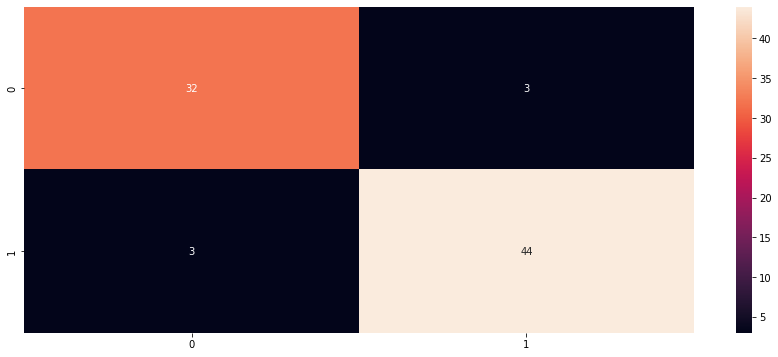

In [46]:
#Confusion Matrix SVM 
cm_heatmap(RF_smote, X_train_scaled_sm, ytrain_smote, X_test_scaled_sm, ytest_smote, train=False)

In [74]:
test_score = (accuracy_score(ytest_smote, RF_smote.predict(X_test_scaled_sm))*100).round(2)
ypred = RF_smote.predict(X_test_scaled_sm)

precision_score = (metrics.precision_score(ytest_smote,ypred)*100).round(2)
recall_score = (metrics.recall_score(ytest_smote,ypred)*100).round(2)
f1_score = (metrics.f1_score(ytest_smote,ypred)*100).round(2)

results_df_2 = pd.DataFrame(data=[["Random Forest (SMOTE)", test_score, precision_score, recall_score, f1_score]], 
                          columns=['Model', 'Testing Accuracy %', 'Precision %', 'Recall %', 'F1 Score %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Testing Accuracy %,Precision %,Recall %,F1 Score %
0,Random Forest,88.33,90.00,78.26,83.72
1,Random Forest (SMOTE),92.68,93.62,93.62,93.62


##Random Forest (Hyperparameter Tuning)

Hyperparameter dilakukan pada model SMOTE karena memiliki akurasi besar yakni sebesar 92.66%

**Melakukan RandomizedSearchCV**

In [62]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 15, stop = 500, num = 4)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(0, 100, num = 6)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [15, 176, 338, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [0, 20, 40, 60, 80, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


**Menggunakan hasil RandomizedSearchCV untuk Hyperparameter**

In [63]:
from sklearn.model_selection import GridSearchCV

n_estimators = [15, 176, 338, 500]
max_features = ['auto', 'sqrt']
max_depth = [0, 20, 40, 60, 80, 100, None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

params_grid = {
    'n_estimators': n_estimators, 
    'max_features': max_features,
    'max_depth': max_depth, 
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
              }

**Random Forest Hyperparameter Tuning**

In [64]:
RF_hyp = RandomForestClassifier(random_state=0)
rf_cv = GridSearchCV(RF_hyp, params_grid, scoring="accuracy", cv=3, verbose=1, n_jobs=-1)
rf_cv.fit(X_train_scaled_sm, ytrain_smote)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

RF_hyp = RandomForestClassifier(**best_params)
RF_hyp.fit(X_train_scaled_sm, ytrain_smote)

print_score(RF_hyp, X_train_scaled_sm, ytrain_smote, X_test_scaled_sm, ytest_smote, train=False)

Fitting 3 folds for each of 1008 candidates, totalling 3024 fits
Best parameters: {'bootstrap': True, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 338}
Test Result:
Accuracy Score: 93.90%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.941176   0.937500  0.939024   0.939338      0.939069
recall      0.914286   0.957447  0.939024   0.935866      0.939024
f1-score    0.927536   0.947368  0.939024   0.937452      0.938903
support    35.000000  47.000000  0.939024  82.000000     82.000000
_______________________________________________
Confusion Matrix: 
 [[32  3]
 [ 2 45]]



Confusion Matrix: 
 AxesSubplot(0.125,0.125;0.62x0.755)



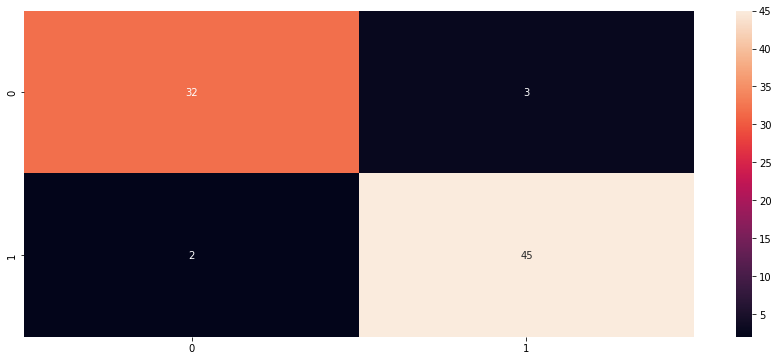

In [70]:
#Confusion Matrix Random Forest (Hyperparameter Tuning)
cm_heatmap(RF_hyp, X_train_scaled_sm, ytrain_smote, X_test_scaled_sm, ytest_smote, train=False)

**Hasil Perbandingan Modelling Random Forest**

In [75]:
test_score = (accuracy_score(ytest_smote, RF_hyp.predict(X_test_scaled_sm))*100).round(2)
ypred = RF_hyp.predict(X_test_scaled_sm)

precision_score = (metrics.precision_score(ytest_smote,ypred)*100).round(2)
recall_score = (metrics.recall_score(ytest_smote,ypred)*100).round(2)
f1_score = (metrics.f1_score(ytest_smote,ypred)*100).round(2)

results_df_3 = pd.DataFrame(data=[["Random Forest (Hyperparameter SMOTE)", test_score, precision_score, recall_score, f1_score]], 
                          columns=['Model', 'Testing Accuracy %', 'Precision %', 'Recall %', 'F1 Score %'])
results_df = results_df.append(results_df_3, ignore_index=True)
results_df

,Model,Testing Accuracy %,Precision %,Recall %,F1 Score %
0,Random Forest,88.33,90.00,78.26,83.72
1,Random Forest (SMOTE),92.68,93.62,93.62,93.62
2,Random Forest (Hyperparameter SMOTE),93.90,93.75,95.74,94.74


Dari ke-3 hasil modelling, dapat disimpulkan bahwa hasil terbaik adalah model dengan Hyperparameter Tuning pada Random Forest (SMOTE) dengan nilai akurasi sebesar 93.9%

# Model Evaluation

**Prediksi untuk ketiga jenis modelling**

In [78]:
RF.predict(X_test_scaled[0:100])

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [79]:
RF_smote.predict(X_test_scaled_sm[0:100])

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [80]:
RF_hyp.predict(X_test_scaled_sm[0:100])

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [97]:
df

,age,ejection_fraction,serum_creatinine,serum_sodium,time,DEATH_EVENT
0,75.0,20.0,0.553861,130,4,1
1,55.0,38.0,0.093201,136,6,1
2,65.0,20.0,0.246791,129,7,1
3,50.0,20.0,0.553861,137,7,1
4,65.0,20.0,0.642597,125,8,1
...,...,...,...,...,...,...
294,62.0,38.0,0.093201,143,270,0
295,55.0,38.0,0.174708,139,271,0
296,45.0,60.0,-0.235300,138,278,0
297,45.0,38.0,0.311149,140,280,0


**Untuk DEATH_EVENT = 1 (Death)**

In [98]:
RF.predict([[75.0,20.0,0.553861,130,4]])

array([0])

In [99]:
RF_smote.predict([[75.0,20.0,0.553861,130,4]])

array([0])

In [100]:
RF_hyp.predict([[75.0,20.0,0.553861,130,4]])

array([0])

**Untuk DEATH_EVENT = 0 (Alive)**

In [101]:
RF.predict([[50.0,45.0,0.421586,136,285]])

array([0])

In [102]:
RF_smote.predict([[50.0,45.0,0.421586,136,285]])

array([0])

In [103]:
RF_hyp.predict([[50.0,45.0,0.421586,136,285]])

array([0])

#Save model in pickle file

In [104]:
# Import model tanpa SMOTE
import pickle
pickle.dump(RF, open('./RF_model_predict','wb'))

In [108]:
# Import model setelah SMOTE
pickle.dump(RF_smote, open('./RF_model_smote_predict','wb'))

In [110]:
# Import model hyperparameter dengan SMOTE
import pickle
pickle.dump(RF_hyp, open('./RF_model_smote_predict_hyp','wb'))

#Conclusion

In [111]:
results_df

,Model,Testing Accuracy %,Precision %,Recall %,F1 Score %
0,Random Forest,88.33,90.00,78.26,83.72
1,Random Forest (SMOTE),92.68,93.62,93.62,93.62
2,Random Forest (Hyperparameter SMOTE),93.90,93.75,95.74,94.74


Dataset ini tidak terdapat missing values, nilai duplikat maupun invalid data. Pada variable target (DEATH_EVENT) mengalami ketidakseimbangan data dengan presentase data 32.11% status kematian dan 67.89% status masih hidup. Pada proses eksplorasi data, variabel time memiliki pengaruh yang cukup signifikan hal ini dikarenakan semakin tinggi waktu follow up (time) semakin rendah perkiraan pasien mengalami kejadian kematian. Usia dengan tingkat kejadian kematian tertinggi yaitu pada usia 60 tahun. 

Pada variabel kategorik seperti status anemia, diabetes, tekanan darah tinggi, gender dan merokok dihasilkan seperti berikut :

* pasien yang memiliki anemia tingkat kematian lebih tinggi daripada yang tidak.
* proporsi tingkat kematian orang yang memiliki diabetes atau tidak, tidak ada perbedaan yang signifikan bahkan cenderung sama yaitu pada presentase 32%
* Untuk pasien dengan tekanan darah tinggi seperti yang telah diuraikan pada tahap EDA, pasien yang memiliki darah tinggi memiliki tingkat kejadian kematian yang tinggi dibanding dengan pasien yang tidak memiliki.
* status gender tidak mempengaruhi tingkat status kematian secara signifikan terhadap death event
* status pasien perokok atau tidak, juga tidak terlalu berpengaruh banyak terhadap death event

Dari pernyataan diatas dapat disimpulkan bahwa variabel diabetes, smoking, dan sex(gender) kurang berpengaruh secara signifikan terhadap death_event. maka dari itu variabel-variabel tersebut didrop. 

Setelah dilakukan modeling menggunakan algoritma Random Forest (Default) didapatkan akurasi sebesar 88.33%. Pada tahap awal visualisasi data terlihat bahwa dataset mengalami ketidakseimbangan data pada variabel target, maka dari itu dilakukan percobaan menggunakan metode oversampling SMOTE untuk mendapatkan data yang seimbang. Setelah dilakukan precobaan oversampling dengan menggunakan algoritma yang sama yaitu Random Forest didapatkan akurasi sebesar 92.68%. 

Kemudian dilakukan Hyperparameter Tuning pada Model Random Forest SMOTE. Didapatkan hasil akurasi sebesar 93.90%, sehingga dapat dikatakan model terbaik adalah model Random Forest (Hyperparameter Tuning) dengan SMOTE. Untuk evaluasi model lain seperti Precision, Recall, dan F1 Score juga memiliki nilai tertinggi pada model Random Forest (Hyperparameter Tuning).
